In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
data = pd.read_csv('성격점수.csv',encoding='cp949').reset_index(drop=True)
data.head()
data=pd.concat([data.apply(pd.to_numeric)], axis=1)
X=data.set_index('userid')

In [44]:
X

,외향성,신경성,신중성,근력,심폐지구력,유연성
userid,,,,,,
1,5,9,5,4,1,1
2,3,8,4,2,4,1
3,9,2,5,5,5,1
4,4,5,7,4,4,2
5,7,5,10,4,5,3
...,...,...,...,...,...,...
242,5,6,6,3,3,3
243,6,6,5,5,3,2
244,7,6,4,2,4,5


In [45]:
X.columns=['Extro','Neuro','Consc','Strength','cardio','flex']


In [46]:
#X[['외향성','신경증','성실성','우호성','개방성','근력','심폐지구력','유연성']]

In [47]:
#predicted=myX
#predicted['pred']=y_hc
#predicted.head(10)
#predicted.to_excel(excel_writer='클러스터링.xlsx')

In [48]:
#predicted.groupby('pred').count().iloc[:,0]

In [49]:
#predicted_med=predicted.groupby('pred').median()
#predicted_med.transpose()

In [50]:
#predicted_med.plot.bar(figsize=(8, 8))
# plt.title("{} clusters, StandardScaler".format(myc))
#plt.show()

## KMeans 클러스터링

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = X.copy()

### data scaling - StandardScaler로 스케일링

In [52]:
# 데이터 전처리 - 정규화를 위한 작업

from sklearn.preprocessing import StandardScaler #StandardScaler #MaxAbsScaler #RobustScaler
scaler = StandardScaler()
fitted = scaler.fit(processed_data)

output_2 = scaler.transform(processed_data)
R_scaled = pd.DataFrame(output_2, columns=processed_data.columns, index=list(processed_data.index.values))
print(R_scaled.head())

      Extro     Neuro     Consc  Strength    cardio      flex
1 -0.500407  1.280827 -0.933401  0.689295 -2.113159 -1.451840
2 -1.548067  0.771807 -1.443660 -0.838331  0.358333 -1.451840
3  1.594914 -2.282314 -0.933401  1.453108  1.182163 -1.451840
4 -1.024237 -0.755253  0.087117  0.689295  0.358333 -0.701520
5  0.547253 -0.755253  1.617895  0.689295  1.182163  0.048801


### KMeans클러스터로 3가지 그룹으로 분류 -> 표가 보이는 값 : 각 그룹별 median

In [53]:
R = KMeans(n_clusters = 3)

R_hc=R.fit_predict(R_scaled)


predicted=R_scaled
predicted['pred']=R_hc
predicted.head()
predicted.groupby('pred').count().iloc[:,0]
predicted_med=predicted.groupby('pred').median()
predicted_med.transpose()

pred,0,1,2
Extro,0.547253,-1.024237,0.547253
Neuro,0.771807,0.262787,-0.755253
Consc,0.087117,-0.423142,0.087117
Strength,-0.074518,-0.838331,0.689295
cardio,0.358333,-0.465498,0.358333
flex,0.799122,-0.701520,0.048801


In [54]:
predicted.to_excel(excel_writer='클러스터링.xlsx')

### 그룹별 median 값 그래프로 시각화

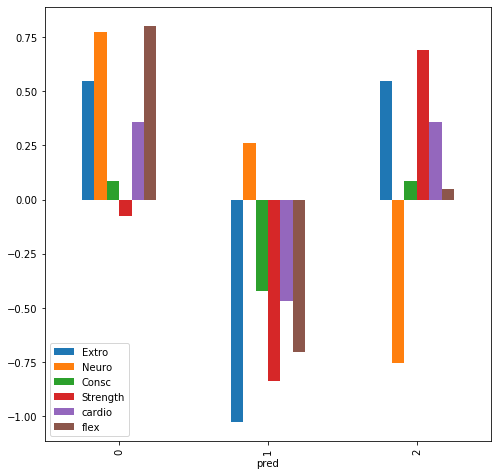

In [55]:
predicted_med.plot.bar(figsize=(8, 8))
# plt.title("{} clusters, StandardScaler".format(myc))
plt.show()